In [1]:
# Goal: Predict whether a person is a high-risk or low-risk borrower based on their financial profile using a decision tree. 

In [2]:
# import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# stimulate a simple credit risk dataset
data = {
    'Age': [25, 40, 35, 45, 23, 52, 36, 29, 50, 20],
    'Income': [50000, 60000, 40000, 80000, 30000, 90000, 42000, 39000, 85000, 20000],
    'LoanAmount': [10000, 20000, 12000, 22000, 5000, 25000, 13000, 9000, 24000, 10000],
    'CreditHistory': [1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
    'Defaulted': [0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# display the dataset
print(df)

   Age  Income  LoanAmount  CreditHistory  Defaulted
0   25   50000       10000              1          0
1   40   60000       20000              1          0
2   35   40000       12000              0          1
3   45   80000       22000              1          0
4   23   30000        5000              0          1
5   52   90000       25000              1          0
6   36   42000       13000              0          1
7   29   39000        9000              0          1
8   50   85000       24000              1          0
9   20   20000       10000              0          1


In [4]:
# define features and target
X = df[['Age','Income','LoanAmount','CreditHistory']]
y = df['Defaulted']

In [5]:
# split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
# initialize the decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [7]:
# Train on the training data
model.fit(X_train,y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [8]:
# predict on test data
y_pred = model.predict(X_test)

In [9]:
# evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[1 1]
 [0 1]]


In [10]:
print("Classification report:")
print("\n",classification_report(y_test,y_pred))

Classification report:

               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



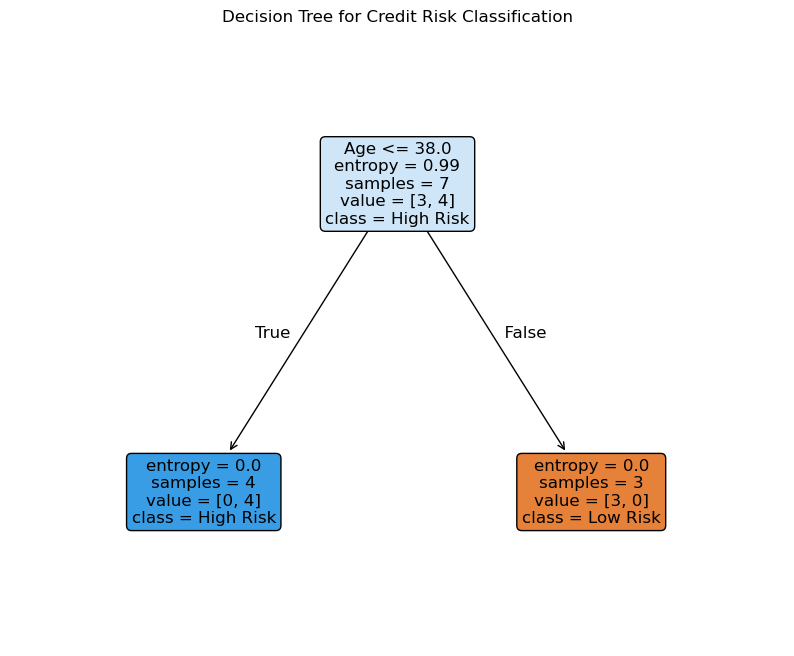

In [11]:
# plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(model, feature_names=X.columns, class_names=['Low Risk', 'High Risk'], filled=True, rounded=True, fontsize=12, precision=2, proportion=False)
plt.title("Decision Tree for Credit Risk Classification")
plt.show()